# <center>Reinforcement Learning to Disentangle Multiqubit Quantum States<br>from Partial Observations</center>
---
### <center>*Interactive Demos*</center>

This notebook accompanies the corresponding preprint article (arxiv:.....) where we present a deep reinforcement learning (RL) approach to constructing short disentangling circuits for arbitrary 4-, 5-, and 6-qubit states using an actor-critic algorithm. The agent has access only to two-qubit reduced density matrices and, given this partial information, decides which pairs of qubits to apply two-qubit gates on. Utilizing a permutation-equivariant transformer architecture, the agent can autonomously identify qubit permutations within the state, and adjusts the disentangling protocol accordingly. Once trained, it provides circuits from different initial states without further optimization. For all details regarding the methods we refer to the manuscript. 

This notebook demonstrates the disentangling abilities of our RL agents. We only show the results of trained 4 and 5-qubit agents, because they produce short enough circuits for this presentation format. Within the demo you can choose from different initial states to start from or specify a custom initial state. Furthermore the demo allows you to modify the multiqubit state by applying arbitrary single- and two-qubit gates. This lets you explore the generalization capabilities of our RL agents. The demo gives you insights about the action selection of the agent by displaying the policy output probabilities $\pi(a|o)$ and the attention scores of the transformer model (only for the 4-qubit agent). You can observe how the agent produces the disentangling circuit step-by-step and adapts to changes in the quantum state. Moreover, we display the expected average reduction in the single-qubit entanglement entropy $\Delta S_\mathrm{avg}$ for every step and each possible action (qubit pair $(i,j)$)

$$\Delta S_\mathrm{avg} = \frac{1}{L}\sum_{i=1}^{i=L}{\Delta S_\mathrm{ent}(\rho^{(i)})}$$

Using this information, it can be seen that our agent is not greedy - there are examples where the chosen action is not the one that minimizes $\Delta S_\mathrm{avg}$.

In [1]:
%matplotlib widget

import numpy as np
from demo_impl import start_demo_4q, start_demo_5q

Set random seed

In [2]:
np.random.seed(7)

#### Use this cell to define additional initial states that you can utilize in the demos below
The demos already contain some pre-defined initial states such as `|0>|Bell>|0>` corresponding to $|0_1\rangle|\mathrm{Bell_{23}}\rangle|0_4\rangle$, `|GHZ>|Bell>` corresponding to $\mathrm{|GHZ_{123}\rangle|Bell_{45}\rangle}$, `|RRRR>|R>` corresponding to $\mathrm{|R_{1234}\rangle|R_5\rangle}$ and so on ...

In [3]:
# States are normalized and converted to np.complex64 automatically
# You can add both 4q and 5q states here - they will appear
# in the corresponding demo below, respectively
my_initial_states = {
    "My4qState": np.random.randn(16) + 1j * np.random.randn(16),
    "My5qState": np.random.randn(32) + 1j * np.random.randn(32),
}

### Demo with 4-qubit agent

#### Running the agent
- The initial state of the circuit (e.g. `|0>|Bell>|0>`) can be specified through the $\mathrm{Initial\ state}$ dropdown menu.
- Use the `Step` button to advance the episode step and apply one action (i.e. gate). The taken action is always the one with the highest probability according to the RL policy.
- Use the `Undo` button to remove the last applied gate (i.e. to undo the latest action).
- Use the `Reset` button to clear everything and initialize the circuit again in the selected state in the $\mathrm{Initial\ state}$ dropdown menu.

#### Additional information
- The current episode step and the corresponding disentangling quantum circuit diagram are displayed in the center left.
- The entanglement entropy of each qubit $S_\mathrm{ent}(\rho^{(i)})$ with the rest of the system is shown in the status box **Single qubit entanglements**. Whenever a qubit is disentangled, it's numeric value turns <mark style="background-color:lightgreen;">green</mark>. 
- The probabilites $\pi(a|o)$ of choosing each action (i.e., qubit indices $(i,j)$) are plotted in blue below the circuit. The action with the highest probability that will be chosen next is indicated in red.
- The average expected entanglement reductions $\Delta S_\mathrm{avg}$ for each possible action (i.e., qubit pair $(i,j)$) are plotted in green below their corresponding policy probabilities.
- The attention scores of the transformer policy network are shown on the right.

#### Changing the quantum state
- You can apply additional single- and two-qubit gates to the quantum state at any episode step. (Note that these gates are not shown in the circuit diagram; only gates chosen by the agent are displayed.)
    - Use **Single qubit rotation** to apply a rotation gate to qubit $i$ (selected trough the dropdown menu). Drag the handles of the sliders to specify the angles of the rotation gate.
    - Use **Two-qubit rotation** to apply a two-qubit gate to qubits $(i,j)$ (selected trough the dropdown menu). Drag the handles of the sliders to specify the angles of the two-qubit rotation gate.
- You can also specify the exact quantum state amplitudes in the computational basis (z-basis) at the bottom. Use the `Set` button to apply the modifications.

GridspecLayout(children=(HTML(value='<b style="font-size:11pt">Single qubit rotation:</b>', layout=Layout(grid…

GridspecLayout(children=(HTML(value='<b style="font-size:11pt">Two-qubit rotation:</b>', layout=Layout(grid_ar…

GridspecLayout(children=(Dropdown(description='$\\text{Initial\\ state}$', layout=Layout(grid_area='widget001'…

HTML(value='<b style="font-size:11pt">Single qubit entanglements:</b>')

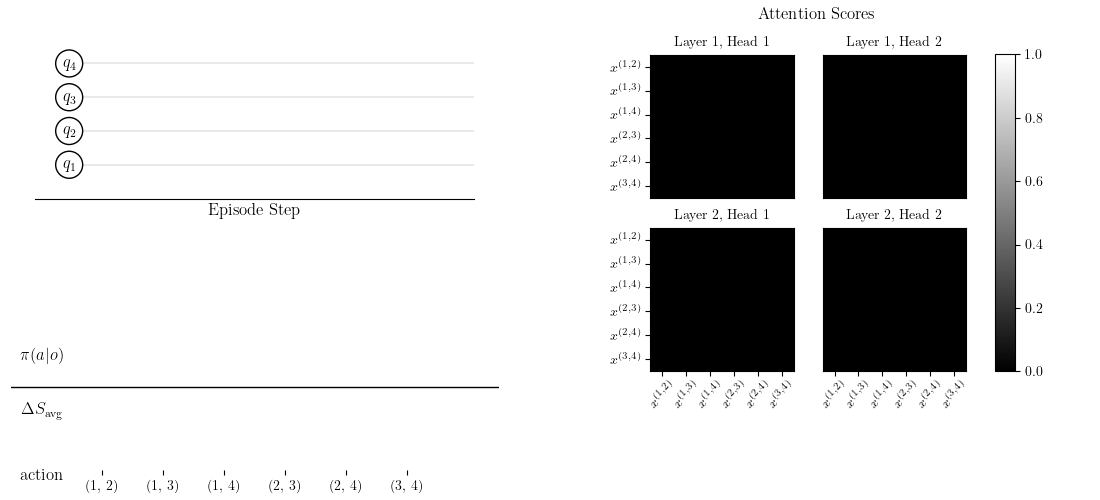

HTML(value='<br>')

GridspecLayout(children=(HTML(value='<b style="font-size: 11pt">Computational / z-basis amplitudes:</b>', layo…

In [4]:
start_demo_4q(my_initial_states)

### Demo with 5-qubit agent
The instructions and information shown are the same as in the 4-qubit demo case above. However here, attention scores are not displayed simply because they would take up too much space.

GridspecLayout(children=(HTML(value='<b style="font-size:11pt">Single qubit rotation:</b>', layout=Layout(grid…

GridspecLayout(children=(HTML(value='<b style="font-size:11pt">Two-qubit rotation:</b>', layout=Layout(grid_ar…

GridspecLayout(children=(Dropdown(description='$\\text{Initial\\ state}$', layout=Layout(grid_area='widget001'…

HTML(value='<b style="font-size:11pt">Single qubit entanglements:</b>')

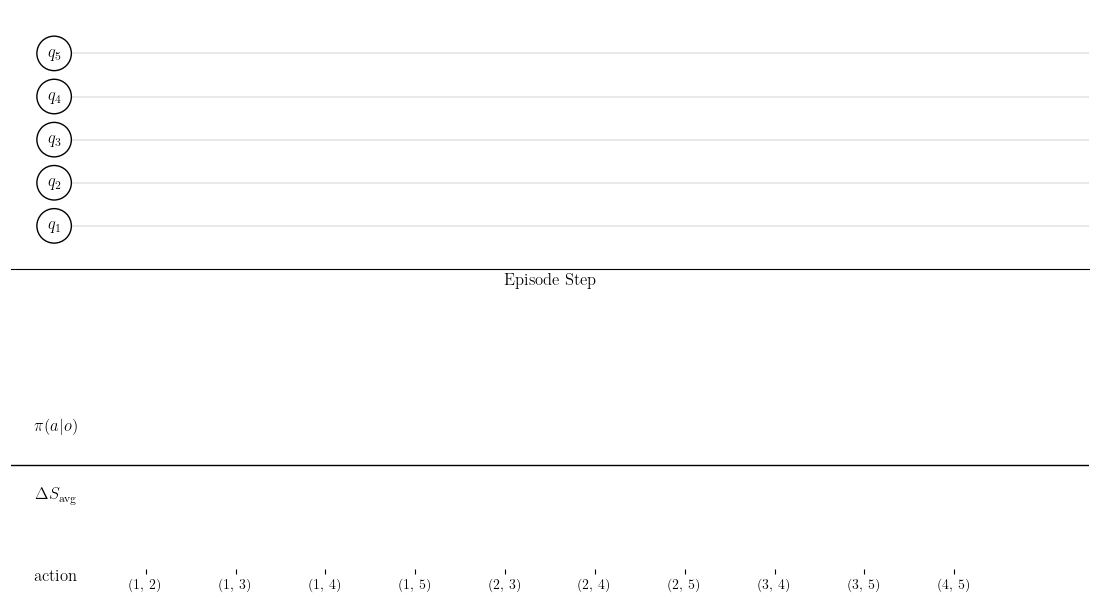

HTML(value='<br>')

GridspecLayout(children=(HTML(value='<b style="font-size: 11pt">Computational / z-basis amplitudes:</b>', layo…

In [5]:
start_demo_5q(my_initial_states)